# Assignment 2 - Monte Carlo

In this assignment, you will develop a model of experimental outcomes which you will use to interpret the results of an experiment.

In each part of this assignment, you will be asked to write some code in the cell indicated.  If you find it convenient to break your code up over multiple cells, please do so.  You will also be asked to briefly discuss your code and results obtained in a text cell.

You should use numpy and scipy libraries where appropriate. You will always be told explicitly if you should **not** use a particular library.  Make sure to comment your code.  Make sure all cells run from a freshly opened notebook before you submit your work.

## Part 1 - Generating a Gaussian Distribution

In this part of the assignment, we will explore a method for generating random numbesr with a Gaussian probability distribution function.

$$ f(x|\mu) = \frac{1}{\lambda \sqrt{2 \pi}}e^\frac{-(x-\mu)^2}{2\lambda^2}$$

Unfortunately the Gaussian cumulative distribution function is not analytically invertible. However, there are a number of alternative transformations in use. One such example is the Box-Muller transformation, which relies on generating _two_ random numbers, $u$ and $v$, each in the range $(0,1)$. It can then be shown that :

$$z = \sqrt{-2\ln{u}} \cos{2 \pi v}$$

has a Gaussian distribution with mean $\mu=0$ and standard deviation $\lambda=1$.

You should implement a function that will generate random values, distributed according to a Gaussian with user-definable mean $\mu$ and standard deviation $\lambda$ (ie. set via arguments).  You should verify that your function does indeed produce a Gaussian distribution for a selection of $\mu$ and $\lambda$.

*******************************************************************
Choose mean values of random distribution:20
*******************************************************************
Choose standard deviation of random distribution:4
*******************************************************************
The Box-Muller Function simulates a sample of size n=10000 in 0.087797 seconds
*******************************************************************
The Marsaglia Function simulates a sample of size n=10000 in 0.088763 seconds
*******************************************************************
Choose number of accepted points in the Accept-Reject Method:200
*******************************************************************
Choose the number of generated points used in the Accept-Reject Method:500
*******************************************************************
Probability that at least 200.0 number of points out of 500.0 generated number of points are accepted is: 1.0
*********************

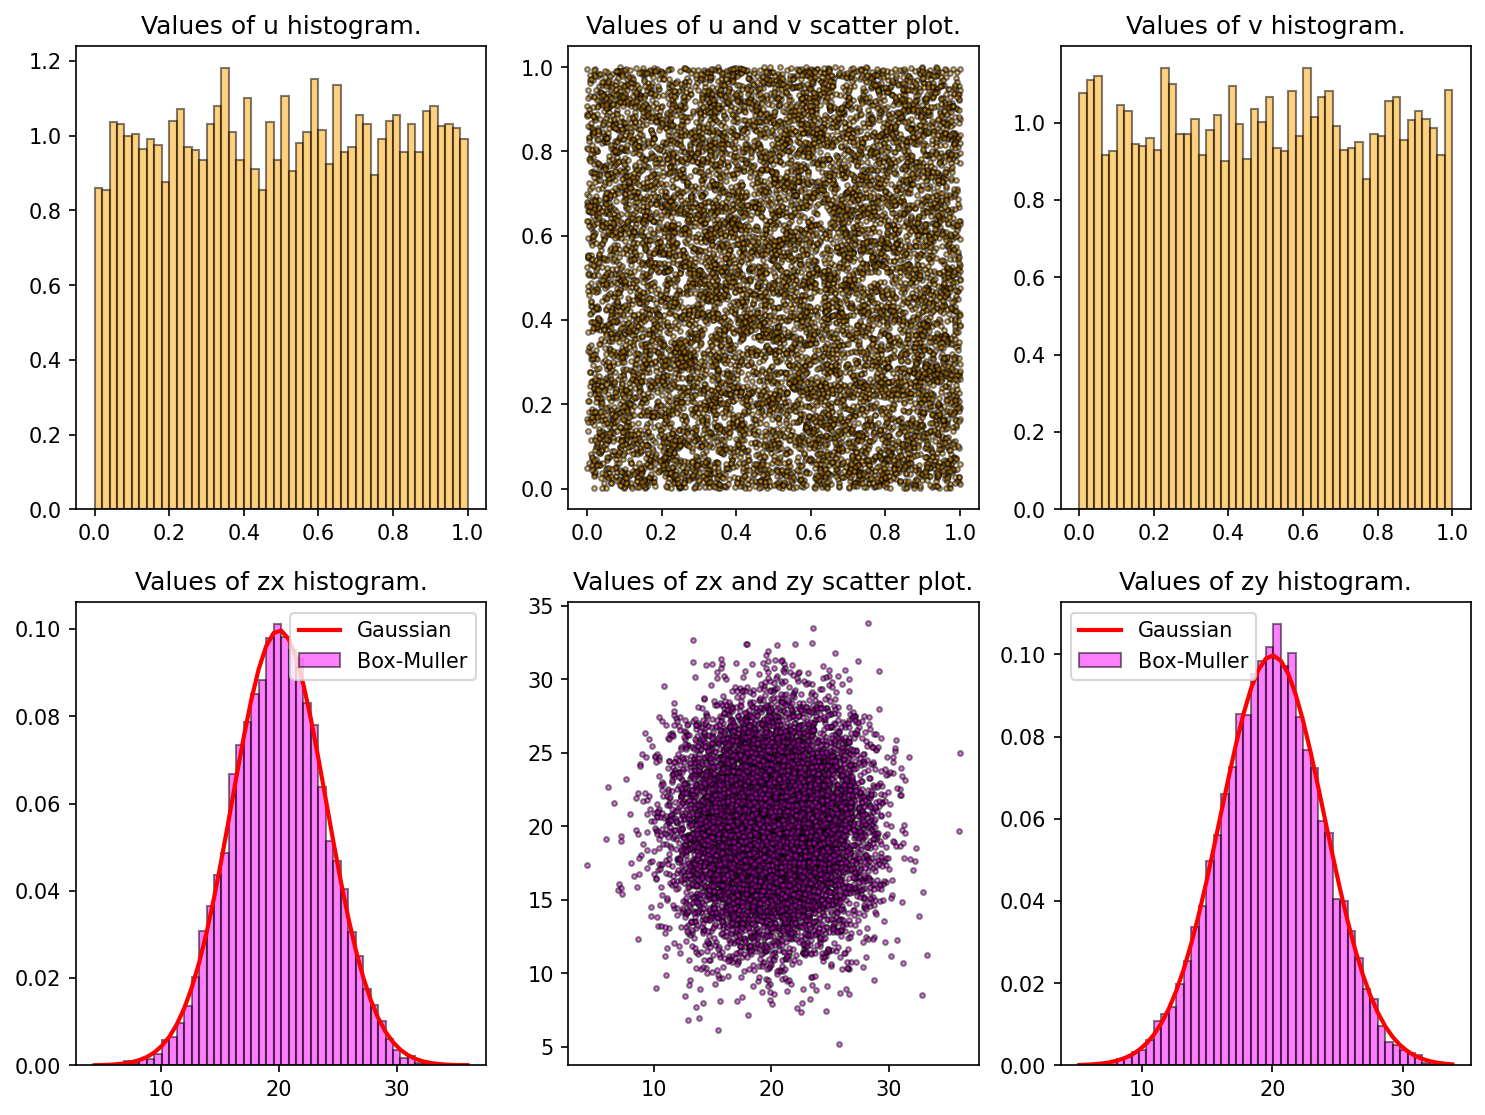

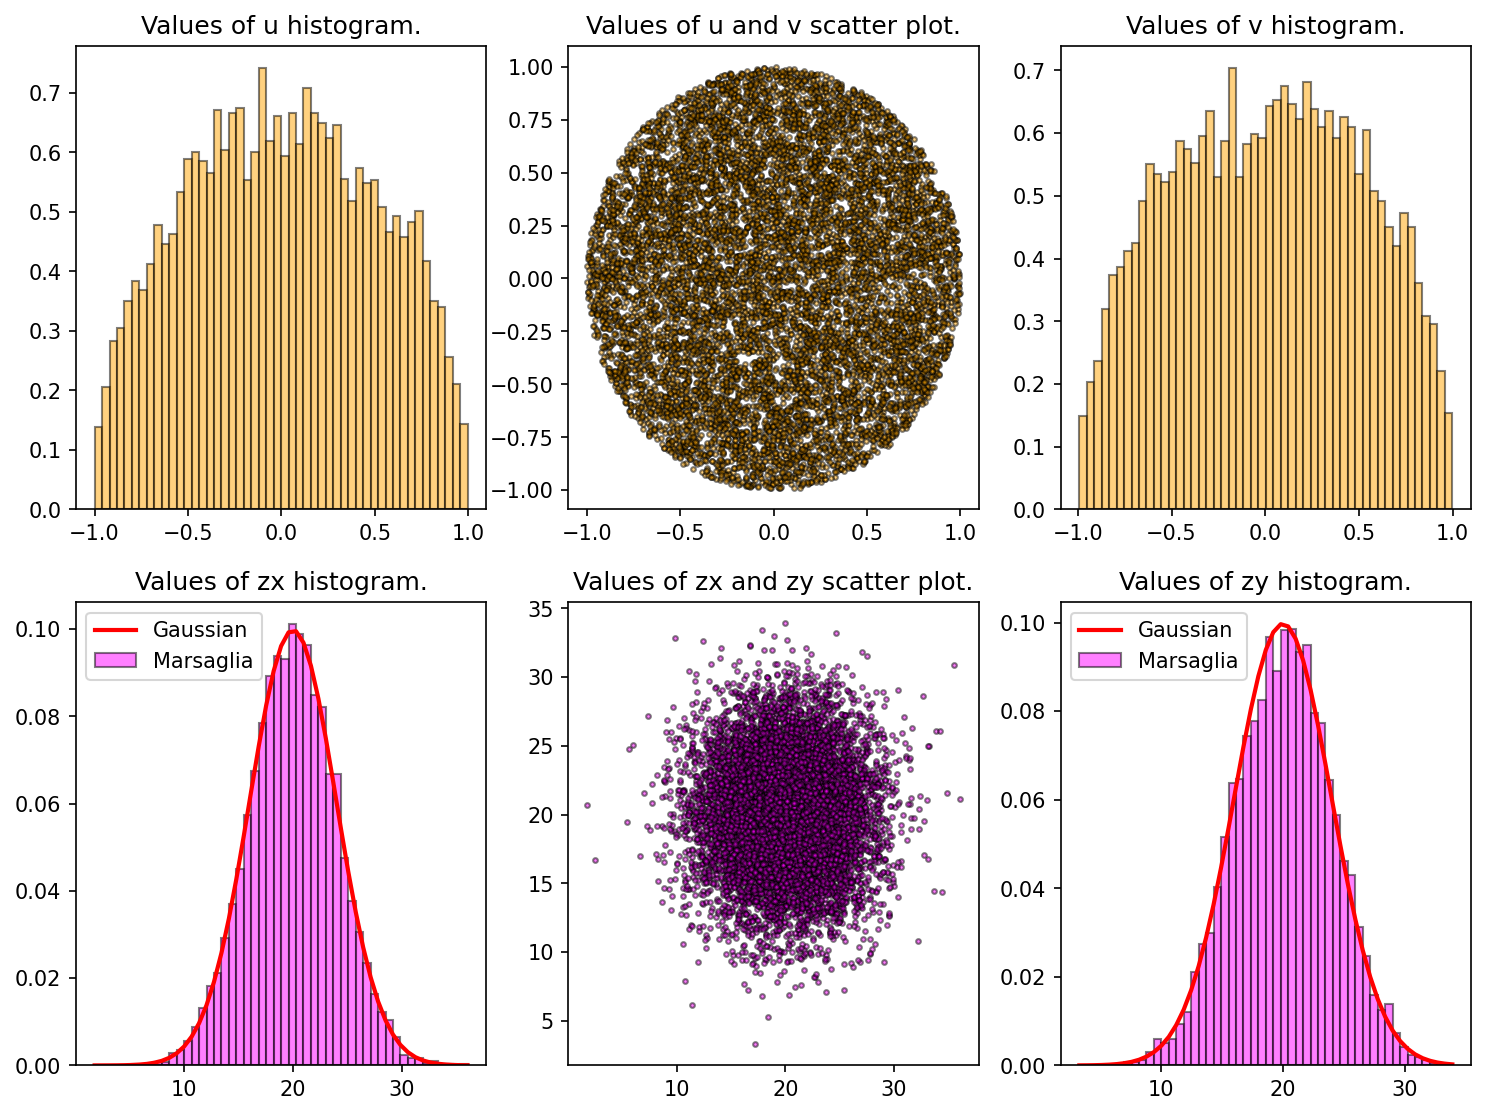

In [1]:
import sys
import time as tm
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Transformation function using Box-Muller method 

def Box_Muller(mu,lamda):
    
    u = np.random.uniform(sys.float_info.epsilon,1.0)  # Generates random values for u between 0 and 1. 
    v = np.random.uniform(sys.float_info.epsilon,1.0)  # Generates random values for v between 0 and 1.
    
    square_term = np.sqrt(-2*np.log(u))
    
    x_term = np.cos(2*np.pi*v)  # Transforms v in first dimension.
    y_term = np.sin(2*np.pi*v)  # Transforms v in second dimension.
    
    zx = square_term*x_term  # Final transformation for Box-Muller in x direction.
    zy = square_term*y_term  # Final transformation for Box-Muller in y direction.
    
    x = mu + lamda*zx  # Ensures a distribution of the user defined mean along first dimension.
    y = mu + lamda*zy  # Ensures a distribution of the user defined mean along second dimension.
    
    return zx,zy,x,y,u,v

# Transformation function using Marsaglia method.

def Marsaglia(mu,lamda):
  
    while True:
        
        w1 = (np.random.uniform(sys.float_info.epsilon,1.0) * 2) - 1  # Generates random values for w1 between -1 and 1.
        w2 = (np.random.uniform(sys.float_info.epsilon,1.0) * 2) - 1  # Generates random values for w1 between -1 and 1.
        s = w1 ** 2 + w2 ** 2
        
        if s < 1:  # Sum of squared random values w1 and w2 does not exceed 1.
            
            t = np.sqrt((-2) * np.log(s)/s)
            
            zx_m = w1 * t  # Final transformation for Marsaglia in x direction.
            zy_m = w2 * t  # Final transformation for Marsaglia in y direction.
            
            x_m = mu + lamda*zx_m  # Ensures a distribution of the user defined mean along first dimension.
            y_m = mu + lamda*zy_m  # Ensures a distribution of the user defined mean along second dimension.
            
            return zx_m,zy_m,x_m,y_m,w1,w2

# Plots histograms and scatter plots. #

def Hist_Scat_Plotter(a,b,c,d,mu,lamda,label1=''):
    
    fig, axs = plt.subplots(2, 3, figsize = (12,9), dpi = 150)  # Optimized figure size for Jupyter.
    
    # First subplot: Historgram of random values u.
    hist1,bins1,patches1 = axs[0, 0].hist(a, bins=50, density=True, color='orange', alpha=0.5, edgecolor='k')
    axs[0, 0].set_title('Values of u histogram.')
    
    # Second subplot: Scatter plot of u and v values.
    axs[0, 1].scatter(a, b, s=5, color='orange', alpha=0.5, edgecolor='k')
    axs[0, 1].set_title('Values of u and v scatter plot.')
    
    # Third subplot: Histogram of random values v.
    hist2,bins2,patches2 = axs[0, 2].hist(b, bins=50, density=True, color='orange', alpha=0.5, edgecolor='k')
    axs[0, 2].set_title('Values of v histogram.')
    
    # Fourth subplot: Histogram of normally distributed zx values with user defined mean and standard deviation.
    hist3,bins3,patches3 = axs[1, 0].hist(c, bins=50, density=True, color='magenta', alpha=0.5, edgecolor='k',label=label1)
    gaussian1 = np.exp( - (bins3 - mu) ** 2 / (2 * lamda ** 2)) / (lamda * np.sqrt(2 * np.pi)) 
    axs[1, 0].plot(bins3,gaussian1,color='red',linewidth=2, label='Gaussian')
    axs[1, 0].set_title('Values of zx histogram.')
    axs[1, 0].legend()
    
    # Fifth subplot: Scatter plot of normalised zx and zy values with user defined mean along each dimension.
    axs[1, 1].scatter(c, d, s=5, color='magenta', alpha=0.5, edgecolor='k')
    axs[1, 1].set_title('Values of zx and zy scatter plot.')
    
    # Sixth subplot: Histogram of normally distributed zy values with user defined mean and standard deviation.
    hist4,bins4,patches4 = axs[1, 2].hist(d, bins=50, density=True, color='magenta', alpha=0.5, edgecolor='k', label=label1)
    gaussian2 = np.exp( - (bins4 - mu) ** 2 / (2 * lamda ** 2)) / (lamda * np.sqrt(2 * np.pi))
    axs[1, 2].plot(bins4,gaussian2,color='red',linewidth=2, label='Gaussian')
    axs[1, 2].set_title('Values of zy histogram.')
    axs[1, 2].legend()
    
    return

# Calculates the probability of n number of points being accepted by Accept-Reject method out of N generated number of points.

def Probability_Calculation(n, N):
    
    p = np.pi/4
    mu = N*p
    sigma = np.sqrt(N*p*(1-p))
    prob =  1 - norm.cdf(n, mu, sigma)
    
    return prob

print('*******************************************************************')
mu = float(input('Choose mean values of random distribution:'))  # User defines the mean.
print('*******************************************************************')
lamda = float(input('Choose standard deviation of random distribution:')) # User defines the standard deviation.

start_b = tm.time()  # Timer starts for Box-Muller implementation.
BM_vals = [Box_Muller(mu,lamda) for _ in range(10000)]  
end_b = tm.time()  # Timer ends for Box-Muller implementation.

t_b = end_b - start_b  # Total time required for Box-Muller implementation for 5000 repetitions.

BM_vals_ar = np.array(BM_vals)  # Box-Muller data list converted into Numpy array.

start_m = tm.time()  # Timer starts for Marsaglia implementation.  
Mars_vals = [Marsaglia(mu,lamda) for _ in range(10000)]
end_m = tm.time()  # Timer ends for Marsaglia implementation.

t_m = end_m - start_m  # Total time required for Marsaglia implementation for 5000 repetitions.

Mars_vals_ar = np.array(Mars_vals)  # Marsaglia data list converted into Numpy array.

Hist_Scat_Plotter(BM_vals_ar[:, 4], BM_vals_ar[:, 5], BM_vals_ar[:, 2], BM_vals_ar[:, 3], mu, lamda, label1='Box-Muller')
Hist_Scat_Plotter(Mars_vals_ar[:, 4], Mars_vals_ar[:, 5], Mars_vals_ar[:, 2], Mars_vals_ar[:, 3], mu, lamda, label1='Marsaglia')

print('*******************************************************************')
print('The Box-Muller Function simulates a sample of size n=10000 in {:.6f} seconds'.format(t_b))
print('*******************************************************************')
print('The Marsaglia Function simulates a sample of size n=10000 in {:.6f} seconds'.format(t_m))
print('*******************************************************************')
n = float(input('Choose number of accepted points in the Accept-Reject Method:'))
print('*******************************************************************')
N = float(input('Choose the number of generated points used in the Accept-Reject Method:'))
print('*******************************************************************')
print('Probability that at least',n,'number of points out of',N,'generated number of points are accepted is:',
       Probability_Calculation(n,N))
print('*******************************************************************')

###### Box - Muller Method

The Box–Muller transformation is a pseudo-random number generator which creates pairs of independent, standard and normally distributed random numbers under the condition that there is a source of uniformly distributed random numbers. The Box–Muller transformation was developed as a more computationally efficient alternative to the inverse transform sampling method. It takes two samples from the uniform distribution on the interval and maps them to two standard, normally distributed samples. It uses the fact that the two-dimensional distribution of two independent zero-mean Gaussian random numbers is radially symmetric if both component Gaussians have the same variance.

#### Method for Box - Muller

Two independent random variables $U_{1}, U_{2}$ are generated and distributed uniformly on (0,1). Then $R=\sqrt{-2 \cdot \ln U_{1}}$ and $\theta=2 \pi U_{1}$ are defined. Combining those it is obtained that:
$$
\begin{array}{l}
Z_{1}=R * \cos (\theta) \\
Z_{2}=R * \sin (\theta)
\end{array}
$$
 which are the independent random variables with standard normal distribution.
 
#### Algorithm Implementation for Box - Muller

In this section the Box - Muller transformation is broken down in steps. As a first step $U_{1}$ is transformed into $R=\sqrt{-2 \cdot \ln{U_{1}}}$. It is worth noting that $Z_{1}, Z_{2}$ can be expressed as $R^{2}=Z_{1}^{2}+Z_{2}^{2}$, which is the sum of two independent squared random variables and hence follows a Chi - Square distribution with 2 degrees of freedom. This itself, coincides with an exponential distribution of mean equal 2.

As a second step $U_{2}$ is mapped into $x=\cos \left(2 \pi U_{2}\right)$ and $Y=\sin \left(2 \pi U_{2}\right)$. The combination of these transformations forms the pairs $(X, Y)=\left(\cos \left(2 \pi U_{2}\right), \sin \left(2 \pi U_{2}\right)\right)$ which define a circle as shown by the scatter plot of the normalised random variables $Z_{1}, Z_{2}$.

Finally, pairs $(X, Y)$ are multiplied by $R$ to obtain $\left(Z_{1}, Z_{2}\right)$. To allow the user to simulate a distribution of his desired mean and standard deviation these the chosen mean from the user is added to both of these values. 

### Marsaglia Method

As discussed above, the implementation of the Box-Muller transform requires logarithmic, square root, sine and cosine functions. The latter can be expensive to compute. American mathematician and computer scientist George Marsaglia developed an alternative of the Box-Muller transform which gets rid of trigonometric functions.

#### Method for Marsaglia

Two independent random variables $W_{1}, W_{2}$ are generated and distributed uniformly on [-1,1] until $S=W 1^{2}+W 2^{2}<1 .$
Combining those it is obtained that:
$$
T=\sqrt{\frac{-2 \log (S)}{S}}
$$
$$
Z_{1}=T * W_{1}
$$
$$
Z_{2}=T * W_{2}
$$
where $Z_{1}, Z_{2}$ are independent random variables with standard normal distribution.

#### Algorithm Implementation for Marsaglia

In this section the Box - Muller transformation is broken down in steps. As a first step points $\left(w_{1}, w_{2}\right)$ within the square of vertices (-1,1),(-1,-1),(1,-1) and (1,1) are generated. 

Then, their square distance to the origin is calculated. This is $s=w_{1^{2}}+w_{2^{2}}$ and only the points within the unit disk are kept as shown in the scatter first scatter plot generated for the Marsaglia method. Next, $T=\sqrt{\frac{-2 \ln \left(W 1^{2}+W_{2} 2\right)}{W 1^{2}+W 2^{2}}}$ is defined in order to map $s$ into $\mathbb{R}^{+}.$

Finally, pairs $\left(Z_{1}, Z_{2}\right)$ are obtained by multiplying $_{T}$ by $\left(w_{1}, w_{2}\right)$. As for the Box - Muller method the mean value of the distribution chosen by the user is added to $Z_{1}, Z_{2}$.

### Accept - Reject Method for Marsaglia

The acceptance probability is $p=\mathbb{P}\left(w_{1}^{2}+w_{2}^{2}<1\right)=\frac{\pi}{4} \approx 0.7854$. This arises from the fact that $W_{1}, W_{2}$ are uniformly distributed on a square of area 4 (vertices of length 2).

A minimum number of points $N \geq n$ needs to be generated in order to guarantee that at least $n$ points will be accepted by the algorithm. More explicitly, for a given number of simulations $\mathrm{N}$ consider $s$ the number of accepted points, i.e.
$$
S=\#\left\{\left(w_{1}, w_{2}\right): s=w_{1}^{2}+w_{2}^{2} \leq 1\right\}.
$$
It is obvious that $s$ follows a Binomial distribution with parameters ${(N, p)}$ where $p=\frac{\pi}{4}$. So, the probability of accepting at least $n$ points is given by
$$
\mathrm{P}(S \geq n) \approx \mathbb{P}(Z \geq n)=1-\mathbb{P}(Z \leq n)
$$
where the Normal Approximation has been used. In the relation above, $z \sim \mathcal{N}(N p, \sqrt{N p(1-p)}$. 

A separate function was defined to help the user determine the probability of accepting the number of points he desires out of a certain number of generated points.

All this explains why the Marsaglia implementation is much slower in the present code. More explicitly, this is partly due to the accept-reject process that takes place within the while loop where samples which are outside the unit circle are discarded.

Sometimes Marsaglia may be faster or slower however due to the randomness of the numbers.





## Part 2 - Upper Limit in a Counting Experiment

A "counting experiment" is performed at a collider, to search for the existence of a hypothesised new particle.  The experiment consists of counting the number of events that meet certain criteria. Events can be produced either by the hypothetical signal process, or by known background processes. However, an individual event cannot be ascribed to be signal or background - the only measurable quantity is the _total_ number of events.

Both signal and background processes produce a number of events that is Poisson distributed. The mean number of background events has been estimated to be $4.8 \pm 0.5$.  The mean number of signal events is given by $L \sigma$, where the integrated luminosity $L=10 \pm 0.3 {\rm nb}^{-1}$, and $\sigma$ is the (unknown) cross section of the signal process. The number of events observed in the real experiment is 6.

You should write a Monte Carlo programme that will calculate an upper limit on the signal cross section, that is compatible with the observation at 95% confidence level.  In order to do this you will need to :
* build a model of the experiment and its uncertainties that you can use to generate pseudo-experiments
* model signal and background as separate Poisson processes
* model all other uncertainties as Gaussian distributed
* scan hypotheses for $\sigma$ and generate probability distributions for the observed event counts for each hypothesis
* compare the PDFs of observed event counts, with the real experiment, to find the upper limit on $\sigma$

An upper limit is a one-sided confidence interval, since the lower bound is always zero.  It differs from a two-sided confidence interval, where an equal fraction of pseudo experiments are found above and below the interval.  The upper limit can be defined as the value of $\sigma$ for which 95% of pseudo-experiments give a result greater than that observed in the real experiment.

First use your model to calculate the upper limit on $\sigma$ that can be inferred from the real experiment, in which 6 events were observed.

Next, consider that a theoretical prediction gives $\sigma = 0.1 {\rm nb}$.  What integrated luminosity would need to be accumulated in order to probe this cross-section at the 95% confidence level?  Assume the mean background scales linearly with luminosity.  You should also calculate an "expected upper limit", which is the limit obtained if the number of observed events equals the mean background.  Perform the calculation for two different assumptions about the uncertainties : 
1. a conservative assumption that the relative uncertainty is fixed (as given above)
2. an optimistic assumption that the relative uncertainty will scale proportional to $L^{-1/2}$

In [ ]:
# Selects the bins corresponding to experiments with up to the number of observed events.

def fBelow(hist, bins, x0):
    
    i = np.searchsorted(bins, x0)
    
    return np.sum(hist[:i:1])

# Selects the value from which fBelow passes and alpha.

def thetaHigh(f_belows, alpha):

    tmp = np.sort(f_belows)
    i = np.searchsorted(tmp, alpha)

    return len(tmp)-i

# This is a 'scanner'. It scan for values over a specific range given specific parameters and plots the results.

def confidenceInterval(x0, scan_range, n_scans, pdf, beta, label_name, name_unit, xlabel, ylabel, title, Lin=False):

    scan_vals=np.linspace(scan_range[0], scan_range[1], n_scans)  # Range of values to scan.

    f_belows = []  # Initiating empty list to be filled later.
    
    if Lin:  # Condition for Conservative and Optimistic assumption. It will change the defined x0 value when called.
        for scan in scan_vals:
            
            hist, bins = pdf(scan)
            x0 = 4.8*scan/10
            f_belows.append(fBelow(hist, bins, x0))
            
    else:  # Condition for scanning the upper limit on the cross section.          
            
        for scan in scan_vals:

            hist, bins = pdf(scan)
            f_belows.append(fBelow(hist, bins, x0))
        
    alpha = 1-beta

    t1 = scan_vals[thetaHigh(f_belows, alpha)]

    # Plots the results and states the specific values found.
    plt.plot(scan_vals, f_belows, label="% expts < x0")
    plt.vlines(t1, 0., f_belows[0], color='red', linestyle='dotted',
               label=label_name + "{:.3e}".format(t1) + name_unit)
    plt.hlines(alpha, scan_range[0], scan_range[1], color='green', linestyle='dotted',
               label=r"$\beta= $"+ str(beta))
    plt.legend()
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.show()
    
    return 

# Generates the background and signal and computes the total signal.

def PoissonPDF(cross_sec, backg, backg_sd, lum, lum_sd, bin_num, pdf_range, exp_count):
    
    # Background and signal values with normally distributed uncertainties.
    backg_events = np.random.normal(backg, backg_sd, exp_count)
    sig_events = np.random.normal(lum*cross_sec, lum_sd*cross_sec, exp_count)
    
    # Values defined above are forced to obey a Poisson distribution. 
    backg_events_pois = np.random.poisson(backg_events)
    sig_events_pois = np.random.poisson(sig_events)
    
    # Defining the total signal. 
    total_sig = backg_events_pois + sig_events_pois
    
    hist_total, bins_total = np.histogram(total_sig, bin_num, pdf_range)
    
    return hist_total/exp_count, bins_total

UserInput_2='0'

while UserInput_2 != 'Q':
    
    # Simple menu for the user to choose which operation to perform.
    print('*******************************************************************')
    print('Choose "A" for upper limit on cross section.')
    print('Choose "B" to find luminosity using conservative assumption.')
    print('Choose "C" to find luminosity using optimistic assumption.')
    print('*******************************************************************')
    UserInput_2 = input('Chose an operation to perform, "A", "B", "C" or "Q":')

    
#To find the upper limit on the cross section.(Part 1)
    if UserInput_2 == "A":  
        
        modelpdf_crsec = lambda cross_sec:PoissonPDF(cross_sec, backg=4.8, backg_sd=0.5,
                                                     lum=10*1e-9, lum_sd=0.3*1e-9, bin_num=100,
                                                     pdf_range=[0,30], exp_count=int(1e5))

        confidenceInterval(x0=6, scan_range=[0, 1*1e9], n_scans=1001, pdf=modelpdf_crsec, beta=0.95,
                           label_name=r"$\sigma_{up} = $", name_unit=r"$b$", xlabel=r"$\sigma$ in b",
                           ylabel=r"$f(\sigma)$", title="Upper limit on signal cross section.", Lin=False)
        
#To find the luminosity required for an upper limit on the cross section of 0.1 nb using a conservative assumption.               
    elif UserInput_2 == "B":  
        
        modelpdf_lum_lin = lambda lum:PoissonPDF(cross_sec=0.1, backg=4.8*lum/10,
                                                 backg_sd=0.5*lum/10, lum=lum, lum_sd=0.3, bin_num=500,
                                                 pdf_range=[0,500], exp_count=int(1e5))

        confidenceInterval(x0=6, scan_range=[100, 500], n_scans=1001, pdf=modelpdf_lum_lin, beta=0.95,
                           label_name=r"$L_{up} = $", name_unit="$nb^{-1}$", xlabel=r"$L$ in $nb^{-1}$",
                           ylabel=r"$f(L)$", title="Upper limit on integrated luminosity.", Lin=True)
        
#To find the luminosity required for an upper limit on the cross section of 0.1 nb using a optimistic assumption.       
    elif UserInput_2 == "C":
        
        modelpdf_lum_sq = lambda lum:PoissonPDF(cross_sec=0.1, backg=4.8*lum/10,
                                                backg_sd=0.5/np.sqrt(lum/10), lum=lum, lum_sd=0.3/np.sqrt(lum/10),
                                                bin_num=500, pdf_range=[0,500], exp_count=int(1e5))
        
        confidenceInterval(x0=6, scan_range=[100, 500], n_scans=1001, pdf=modelpdf_lum_sq, beta=0.95,
                           label_name=r"$L_{up} = $", name_unit="$nb^{-1}$", xlabel=r"$L$ in $nb^{-1}$",
                           ylabel=r"$f(L)$", title="Upper limit on integrated luminosity.", Lin=True)

### Hypothesis Testing and Upper limits

In particle physics, CLs represents a statistical method for setting upper limits on model parameters. A particular form of interval estimation is used for these parameters which allows them to take only non-negative values. It was developed by physicists working at the LEP experiment at CERN and has since then been implemented in numerous high energy physics experiments.  It is a frequentist method meaning that the limit has properties which are defined by means of error probabilities. It is important to note that it differs from standard confidence intervals. More specifically, the stated confidence level of the interval is not equal to its coverage probability. Upper limits derived with the CLs method always include the zero value of the parameter leading to a coverage probability of 100%.

Suppose an experiment consists of measuring $n$ events coming from signal and background processes which are both described by Poisson distributions with rates $s$ and $b$ respectively. This can be expressed as $n \sim \operatorname{Poiss}(s+b)$. Here $b$ is a defined variable and $s$ is the parameter which is to be determined in the experiment. The standard method for establishing an upper limit on $s$ based on an experimental outcome $n^{*}$ consists of rejecting values of $s$ for which $\mathbb{P}\left(n \leq n^{*} \mid s+b\right) \leq \alpha$. This guarantees at least $1-\alpha$ coverage. Consider, for instance, a case where $b=10$ and $n^{*}=0$ events are observed. The result would be that $s+b \geq 10$ is excluded at $95 \%$ confidence level. On the other hand this also suggests that $s \geq 0$ is excluded. Essentially, all possible values of $s$ are rejected. Experimentally it is difficult to interpret such results because very small values of $s$ cannot be distinguished from the background-only hypothesis, and thus the statement that such small values are rejected is not valid. To overcome this difficulty it was suggested that the probability is conditioned. The result of this was that the probability that $n \leq n^{*}$ on the observation is $n_{b} \leq n^{*}$, where $n_{b}$ is the (unmeasurable) number of background events. This is attributed to the fact that when $n_{b}$ is small the procedure is more likely to produce an error than when $n_{b}$ is large, and the distribution of $n_{b}$ itself is independent of $s$. This means that it is not the over-all error probability that  should be reported but the conditional probability as long as there is knowledge on the number of background events in the sample. This conditional probability is:
$$
\mathbb{P}\left(n \leq n^{*} \mid n_{b} \leq n^{*}, s+b\right)=\frac{\mathbb{P}\left(n \leq n^{*}, n_{b} \leq n^{*} \mid s+b\right)}{\mathbb{P}\left(n_{b} \leq n^{*} \mid s+b\right)}=\frac{\mathbb{P}\left(n \leq n^{*} \mid s+b\right)}{\mathbb{P}\left(n \leq n^{*} \mid b\right)}
$$
The first equality just uses the definition of Conditional probability, and the second equality comes from the fact that if $n \leq n^{*} \Rightarrow n_{b} \leq n^{*}$ and the number of background events is by definition independent of the signal strength.

### Results

The first part of this section consisted of scanning for the cross section in a real experiment with 6 events observed. The result obtained was an upper limit for the cross section of around  0.58 nb, given a luminosity of $10 \pm 0.3 {\rm nb}^{-1}$ and background of $4.8 \pm 0.5$. This result is at 95% confidence level. The number of experiments generated was $10e5$.

The second part of this section consisted of scanning for luminosities corresponding to values of cross sections up to 0.1 nb at 95% confidence level. The luminosity obtained was around $480 \rm{~nb}^{-1}$ with the implementation of the conservative assumption. The number of experiments generated was $10e5$.

The last part of this section consisted of scanning for luminosities corresponding to values of cross sections up to 0.1 nb at 95% confidence level, this time implementing an optimistic assumption. The luminosity obtained this time was around $150 \rm{~nb}^{-1}$. The number of experiments generated was $10e5$.

There is an obvious flunctuation of the results obtained by looking at the spread of the curve. This suggests the existence of an error of at least ±5% during the determination of the point crossing the confidence level. This spread and errors are dependent on the number of experiments generated and number of bins of the distributions generated. More specifically, certain bins describe much more results than others depending on the part of the curve they represent. For instance, in a simulation of $10^6$ experiments, if one bin contains $10^4$ results, it represents 20% of the curve resulting in very serious statistical fluctuations.

It is physically expected that the values of luminosity in the second part are significantly greater than those of obtained while scanning for the cross section. If we consider that the cross section is reduced to 0.1 nb, a much greater luminosity is required to show a signal for such a tiny region and thus detect any particles.